In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import random

## Download the PASCAL VOC Dataset

### The VOC2012 Data Set
**Train set:**  5717 images   
**Validation set**: 5823 images  
**Train Val**: 11540 images. This is the two sets combined.  
**Test Set**: 10991 images.


In [4]:
# EDIT THIS FOR COLAB
data_folder = "./data" # for Colab
data_folder = "/vol/data/dataLocal/PyTorchData" # for local

In [30]:
# Train Data
train_set = torchvision.datasets.VOCDetection(root=data_folder, year="2012", image_set="train",
                                        download=False, transform=transforms.PILToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32,
                                          shuffle=True, num_workers=2)
type(train_set)

torchvision.datasets.voc.VOCDetection

In [15]:
# Validation Data
val_set = torchvision.datasets.VOCDetection(root=data_folder, year="2012", image_set="val",
                                           download=False) #, transform=transform)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=32,
                                            shuffle=False, num_workers=2)

In [18]:
#  Test Set
# Available only for VOC2007
test_set = torchvision.datasets.VOCDetection(root=data_folder, year="2007", image_set="test",
                                           download=False) #, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32,
                                            shuffle=False, num_workers=2)

torchvision.datasets.voc.VOCDetection

In [22]:
print(f'Train Set Size: {len(train_loader.dataset)}')
print(f'Validation Set Size: {len(val_loader.dataset)}')
print(f'Test Set Size: {len(test_loader.dataset)}')

Test Set Size: 5717
Validation Set Size: 5823
Test Set Size: 4952


In [23]:
img, annotation = train_set[0]
img

tensor([[[255, 255, 255,  ..., 202, 203, 204],
         [255, 255, 255,  ..., 203, 203, 202],
         [255, 255, 255,  ..., 206, 205, 205],
         ...,
         [205, 194, 206,  ..., 137, 120, 119],
         [192, 193, 193,  ..., 111, 108, 122],
         [178, 180, 185,  ...,  82,  73,  80]],

        [[255, 255, 255,  ..., 205, 206, 207],
         [255, 255, 255,  ..., 206, 206, 205],
         [255, 255, 255,  ..., 209, 208, 208],
         ...,
         [191, 180, 192,  ..., 128, 112, 113],
         [178, 179, 179,  ..., 106, 103, 119],
         [164, 166, 171,  ...,  77,  68,  77]],

        [[255, 255, 255,  ..., 248, 249, 250],
         [255, 255, 255,  ..., 249, 249, 248],
         [255, 255, 255,  ..., 252, 251, 251],
         ...,
         [178, 167, 179,  ..., 119, 101, 101],
         [165, 166, 166,  ..., 100,  97, 110],
         [151, 153, 158,  ...,  73,  64,  70]]], dtype=torch.uint8)

Object annotation is found in `train_set[0][1]['annotation']['object']`

In [29]:
annotation['annotation']['object'][1]

{'name': 'person',
 'pose': 'Unspecified',
 'truncated': '1',
 'occluded': '0',
 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
 'difficult': '0'}

For visualisations

In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


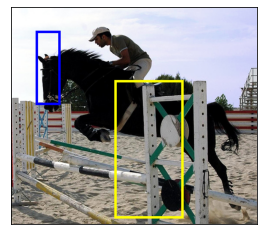

In [50]:
from torchvision.utils import draw_bounding_boxes
boxes = torch.tensor([[50, 50, 100, 200], [210, 150, 350, 430]], dtype=torch.float)
colors = ["blue", "yellow"]
result = draw_bounding_boxes(train_set[0][0], boxes, colors=colors, width=5)
show(result)